In [1]:
!pip install seaborn==0.11.0

You should consider upgrading via the '/home/german/venv/vonneumann/bin/python3 -m pip install --upgrade pip' command.


In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5, style='darkgrid')
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pathlib
pd.set_option('display.max.columns', 100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Carga de archivos de los resultados, los resultados estan desagregados.

In [3]:
path = pathlib.Path("data/scalability") 
results = pd.DataFrame()
files = []
for i in path.glob('**/*.csv'):
    partial = pd.read_csv(i.absolute())
    one_class =  i.name.split('.csv')[0]
    print(i, one_class)
    partial['one_class'] = one_class
    results = pd.concat([results, partial], ignore_index = True)


data/scalability/boundaries.csv boundaries
data/scalability/one.csv one


In [4]:
results['IS'] = np.where(results['isMethod'] == 'drop3', results['isMethod'] + '-' + results['one_class'], results['isMethod'] )
results['LSH'] =results.lshMEthod
results['total_time'] = results.timeLSH + results.timeIS

In [35]:
cm = [(0.1411764705882353, 0.1411764705882353, 0.1411764705882353), 
(0.28627450980392155, 0.28627450980392155, 0.28627450980392155), 
(0.42745098039215684, 0.42745098039215684, 0.42745098039215684),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431), 
(0.7137254901960784, 0.7137254901960784, 0.7137254901960784), ]

In [36]:
is_map = {'entropy': 'entropy', 'boundaries':'drop3-boundaries', 'one': 'drop3-one'}
lsh_map = {'hyperplanes': 'RHF', 'projection':'DPF', 'hyperplanes-projection': 'RHF+DPF'}

In [7]:
results['LSH'] = results.LSH.map(lsh_map )

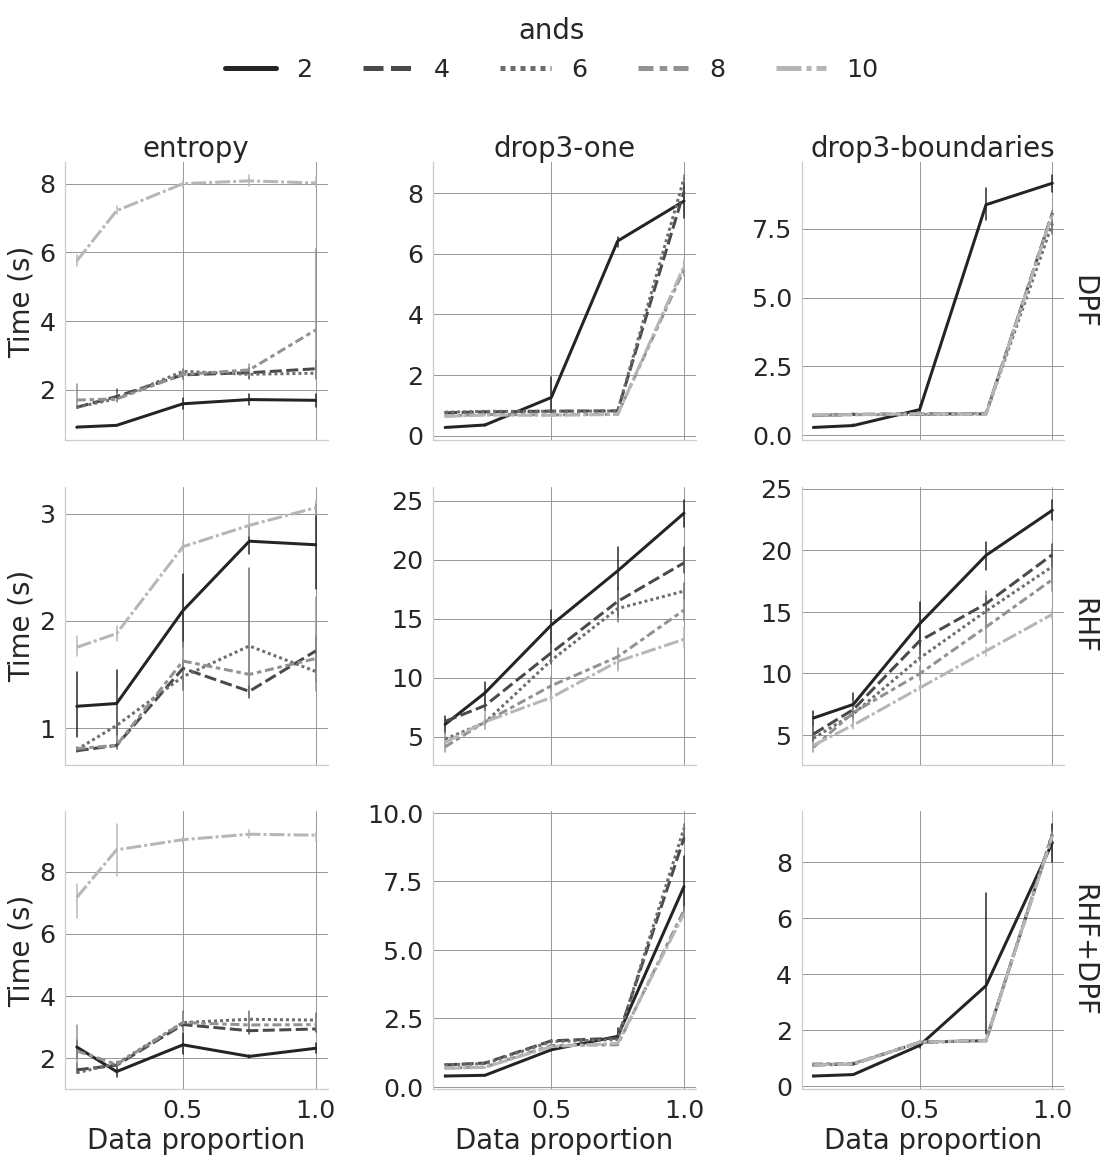

In [50]:
# plot for vertical scalability
sns.set(font_scale=2.3, style='whitegrid',
        rc={'grid.color': '.6'})

#ls = {'color': ['k', 'r', 'b', 'g', 'c'], "ls" : ["-",":", "--", "-.", "-"]}

g = sns.relplot(data = results[results.executors == 16],
                x ='rate',
                y= 'total_time',  err_style =  'bars', 
                linewidth = 3, 
                  col = 'IS',
                  row = 'LSH',
                  aspect =0.95, height=5,
                  facet_kws = {'margin_titles':True, 'sharey':False},
                    palette=cm,
                  col_order = ["entropy", "drop3-one", "drop3-boundaries"], 
                  row_order = ["DPF", "RHF", "RHF+DPF"],
                    hue = 'ands',style = 'ands', kind = 'line')

sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=5, frameon=False)

for line in g._legend.get_lines():
            line.set_linewidth(5)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set_xlabels('Data proportion')
g.set_ylabels('Time (s)')
plt.tight_layout()
g.savefig(f"report/vertical.png")
plt.show()


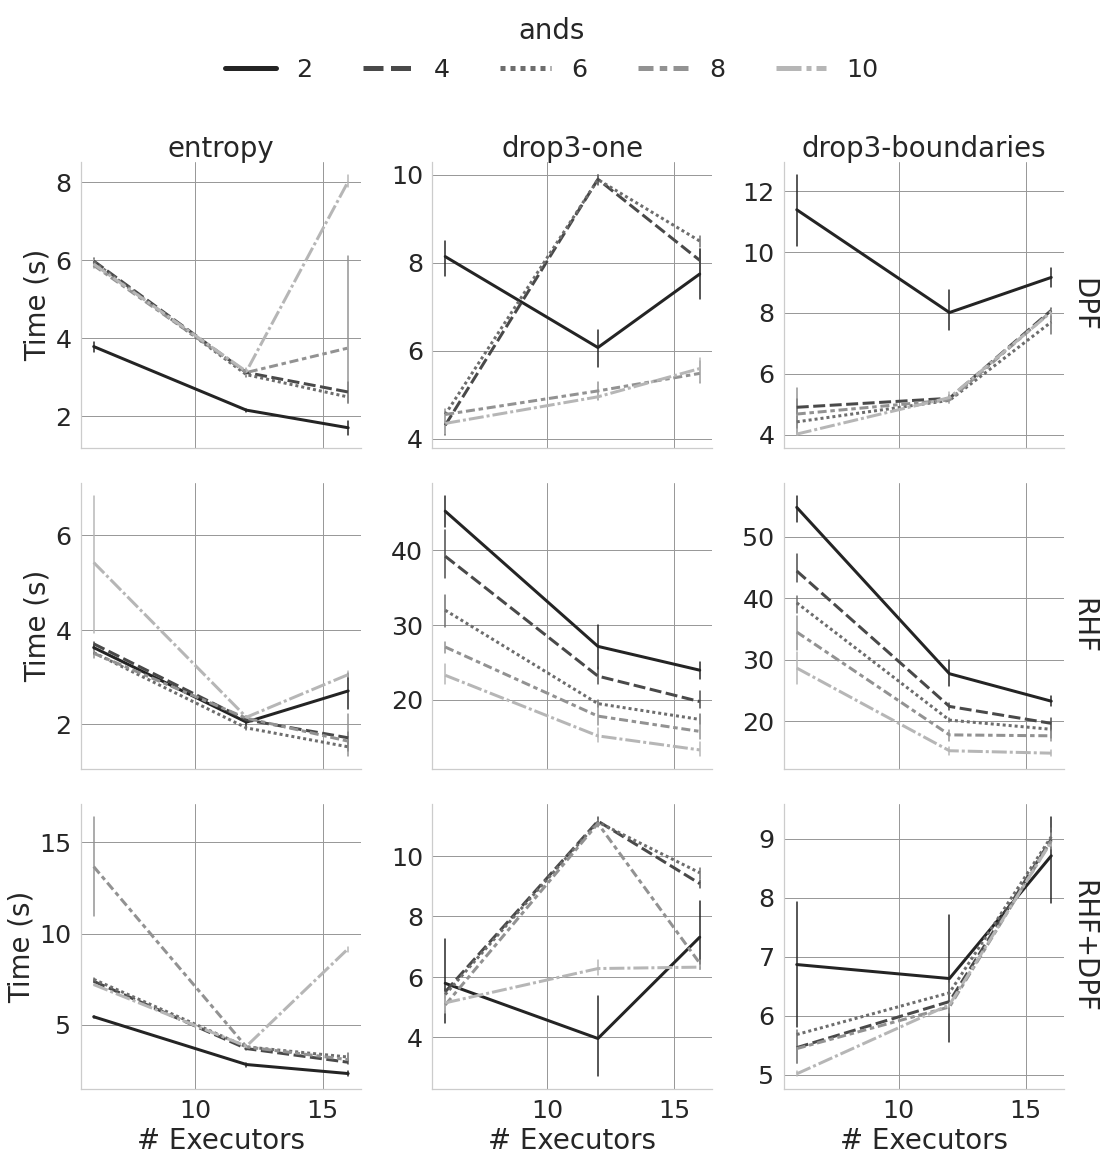

In [51]:
# plot for vertical scalability

g = sns.relplot(data = results[(results.rate == 1.0) & (results.executors>2)],
                x ='executors',
                y= 'total_time',  err_style =  'bars', 
                linewidth = 3, 
                  col = 'IS',
                  row = 'LSH',
                  aspect =0.95, height=5,
                  facet_kws = {'margin_titles':True, 'sharey':False},
                    palette=cm,
                  col_order = ["entropy", "drop3-one", "drop3-boundaries"], 
                  row_order = ["DPF", "RHF", "RHF+DPF"],
                    hue = 'ands',style = 'ands', kind = 'line')

sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=5, frameon=False)


for line in g._legend.get_lines():
            line.set_linewidth(5)    

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set_xlabels('# Executors')
g.set_ylabels('Time (s)')
plt.tight_layout()
g.savefig(f"report/horizontal.png")
plt.show()


----

## former

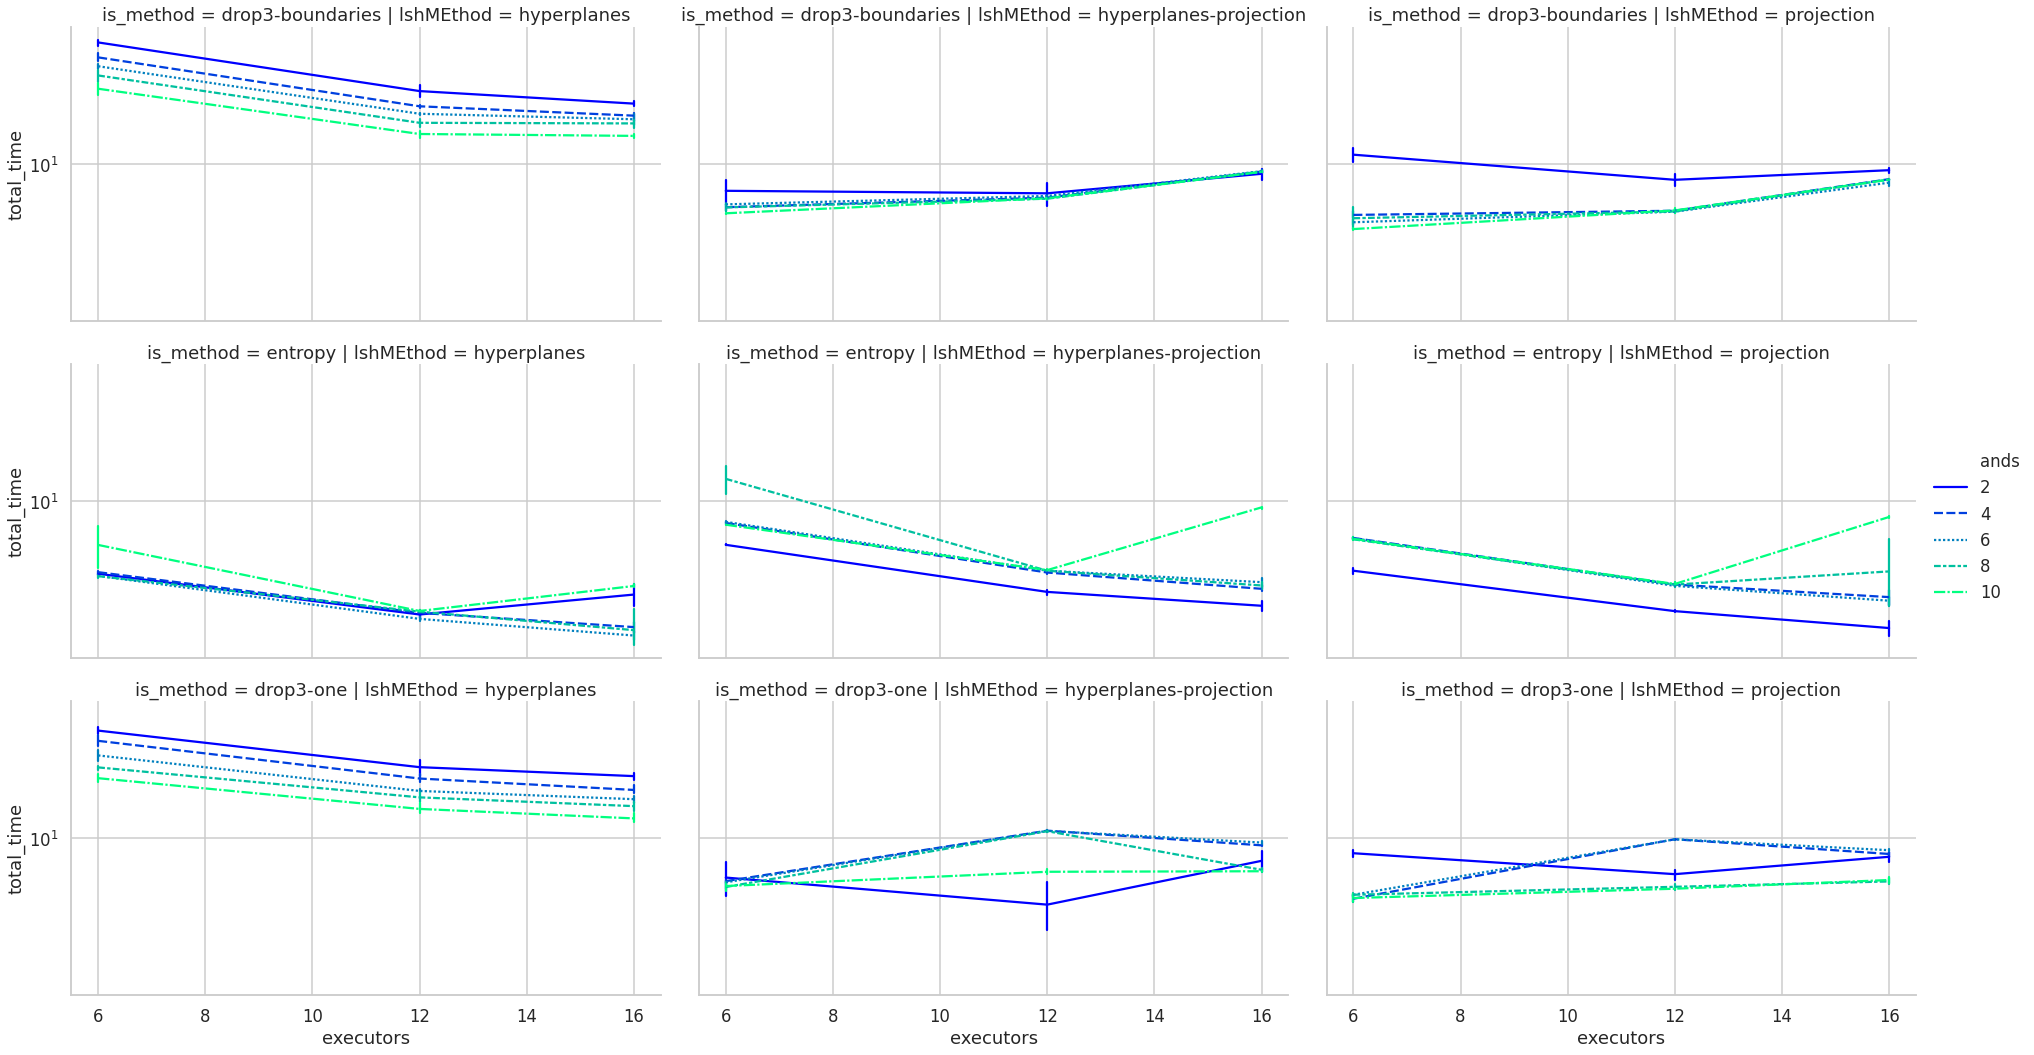

In [8]:
# plota for horizontal scalability
g = sns.relplot(data = results[(results.rate == 1.0) & (results.executors>2)], 
                x ='executors', 
                y= 'total_time', 
                col = 'lshMEthod', 
                row = 'is_method', 
                hue = 'ands',
                style = 'ands', 
                kind = 'line', 
                aspect = 1.8,
                facet_kws = {'sharey': 'all'},
                 palette=plt.get_cmap("winter"),
                err_style =  'bars',  legend = 'full')
g.set(yscale="log")
g.savefig(f"report/horizontal.png")
plt.show()


In [ ]:
# plot for vertical scalability
sns.set(font_scale=1.8, style='whitegrid',
        rc={'grid.color': '.6'})

gg = sns.relplot(data = results[results.executors == 12], 
                x ='rate', 
                y= 'total_time', 
                row = 'is_method', 
                style = 'ands', 
                hue = 'ands', 
                kind = 'line', 
                aspect = 2,
                palette=plt.get_cmap("winter"),
                col = 'lshMEthod',
                facet_kws = {'sharey': 'all'},
                err_style =  'bars',  legend = 'full')
leg = gg._legend

g = sns.relplot(data = results[results.executors == 12], 
                x ='rate', 
                y= 'total_time', 
                row = 'is_method', 
                style = 'ands', 
                hue = 'ands', 
                kind = 'line', 
                aspect = 2,
                palette=plt.get_cmap("winter"),
                col = 'lshMEthod',
                facet_kws = {'sharey': 'all'},
                err_style =  'bars',  legend = False)

current_labels = [label.get_text() for label in leg.texts]
current_handlers = leg.legendHandles
dict_legend = {label: handler for label,handler in zip (current_labels, current_handlers) } 
g.fig.subplots_adjust(wspace=0.1, hspace=0.1, top = 1.0 )
g.add_legend(dict_legend, bbox_to_anchor=(0.05, 1.1,1.0, 0.0), loc='upper left',
                     ncol=5, mode=None, borderaxespad=0.5, fontsize = 28, borderpad = 0.8)

g.set(yscale="log")
g.savefig(f"report/vertical.png")
plt.show()
